#### imports

In [1]:
from annoy import AnnoyIndex
from fastai.vision.all import *
from mytools.tools import *
from fur.paths import *
from fur.learn import *
from IPython.display import Image,display
import requests

In [2]:
mapping_df = images_df()

In [42]:
model_path = models_path/'model_furniture_styles_24_11_2020-11-24 20:33:21.731581'

In [43]:
# model_path =models_path/path_info(models_path).sort_values(['time'])['name'].iloc[-1];model_path

In [44]:
model_path.ls()

[Path('/home/dima/furniture_data/models/model_furniture_styles_24_11_2020-11-24 20:33:21.731581/test.ann'),
 Path('/home/dima/furniture_data/models/model_furniture_styles_24_11_2020-11-24 20:33:21.731581/feature_dict.pkl'),
 Path('/home/dima/furniture_data/models/model_furniture_styles_24_11_2020-11-24 20:33:21.731581/model.pkl')]

In [45]:
len(model_path.ls())

3

In [46]:
learn = load_learner(model_path/'model.pkl')
sf = SaveFeatures(learn.model[1][7])

t = AnnoyIndex(512, 'euclidean')
t.load(str(model_path/'test.ann'))

feature_dict = from_pickle(model_path/'feature_dict.pkl')

In [47]:
t.get_n_items()

19621

In [48]:
models_path

Path('/home/dima/furniture_data/models')

#### predict

In [49]:
pred_item_url = 'https://i.pinimg.com/564x/17/3a/2b/173a2bf7af455fc310ca09506017ddac.jpg'
save_file_from_url(pred_item_url, 'pred.jpg')

In [50]:
pred = learn.predict('pred.jpg');pred[0]

'Contemporary'

In [51]:
len(sf.features)

1

In [52]:
similar = t.get_nns_by_vector(sf.features[-1], 500, include_distances=False)

In [53]:
similar

[2598,
 13971,
 9135,
 11810,
 11089,
 18330,
 15504,
 6137,
 18068,
 430,
 6523,
 11374,
 10363,
 8609,
 15783,
 13944,
 18973,
 18341,
 18323,
 3468,
 7376,
 3675,
 4468,
 15694,
 17182,
 9127,
 8053,
 822,
 235,
 4143,
 12333,
 6230,
 15991,
 16426,
 4687,
 2880,
 3521,
 4518,
 4778,
 4477,
 7504,
 12305,
 12042,
 4255,
 11461,
 6699,
 9475,
 1395,
 13137,
 18193,
 82,
 19531,
 15605,
 15060,
 446,
 15214,
 15947,
 1238,
 14505,
 6999,
 16016,
 16169,
 16142,
 3153,
 9827,
 4460,
 427,
 6210,
 2574,
 11202,
 5903,
 14344,
 10804,
 3452,
 7702,
 10884,
 6522,
 4756,
 16391,
 12239,
 7807,
 8107,
 12196,
 997,
 8762,
 12076,
 4032,
 15250,
 8870,
 14841,
 7181,
 15352,
 2727,
 4145,
 9432,
 7321,
 8281,
 7158,
 10280,
 1662,
 16384,
 13537,
 1696,
 14282,
 10828,
 5905,
 18642,
 18122,
 6388,
 2675,
 9537,
 9251,
 18312,
 10852,
 4235,
 5144,
 9014,
 1928,
 18840,
 3720,
 10239,
 14794,
 11417,
 10732,
 7993,
 16077,
 9516,
 4886,
 12021,
 14522,
 7558,
 17824,
 3884,
 6118,
 8338,
 9

In [54]:
mapping_df.groupby(['category'])['paths'].count().sort_values().tail(10)

category
Desks And Hutches                      18526
Outdoor Lounge Sets                    19218
Headboards                             19506
Dining Tables                          23607
Kitchen Sinks                          26509
Sofas                                  27839
Bathroom Vanities And Sink Consoles    28857
Office Chairs                          30010
Dining Chairs                          35762
Bar Stools And Counter Stools          36894
Name: paths, dtype: int64

In [55]:
mapping_df['path_name'] = mapping_df['paths'].apply(lambda x:x.name)

In [57]:
similar_df = mapping_df[mapping_df['paths'].apply(lambda x:x.name).isin([list(feature_dict.keys())[i] for i in  similar])]

In [58]:
similar_df = similar_df[similar_df['category']=='Dining Tables']

In [59]:
similar_df

,paths,url,manufactured by,sold by,size/weight,color,materials,assembly required,category,style,collection,amount,currency,commercial-grade,size,weight,designer,brand,path_name
4195,/home/dima/ssd/furniture_data/pictures/e3f16b470e828ea2_4-5882.jpg,https://www.houzz.com/products/otago-dining-table-round-white-prvw-vr~29133780,Moe's Home Collection,Houzz,"W 47"" / D 47"" / H 29.5"" / 117 lb.",White,"Solid Wood, MDF, Brushed Stainless Steel, Natural Walnut Veneer",Yes,Dining Tables,Transitional,Otago,1595,USD,NaN,NaN,NaN,NaN,NaN,e3f16b470e828ea2_4-5882.jpg
10628,/home/dima/ssd/furniture_data/pictures/60b16474087d02db_4-8625.jpg,https://www.houzz.com/products/42-burlington-round-dining-table-two-9-drop-leaves-black-and-cherry-prvw-vr~82814294,M&D Furniture,Dining Furniture,"W 42"" / D 42"" / H 30"" / 48 lb.",Black and Cherry,NaN,Yes,Dining Tables,Traditional,Burlington Table,179.11,USD,NaN,NaN,NaN,NaN,NaN,60b16474087d02db_4-8625.jpg
187289,/home/dima/ssd/furniture_data/pictures/ced1259c0d9f5fa9_4-4028.jpg,https://www.houzz.com/products/expandable-farmhouse-table-harvest-wheat-finish-6-l-8-l-prvw-vr~149831078,James+James,James and James Furniture,"W 42"" / D 96"" / H 30"" / 10.94 lb.",Harvest Wheat Finish,solid Hardwood,Yes,Dining Tables,Transitional,NaN,4020,USD,NaN,NaN,NaN,NaN,NaN,ced1259c0d9f5fa9_4-4028.jpg
402359,/home/dima/ssd/furniture_data/pictures/0bb156810e789a07_4-0667.jpg,https://www.houzz.com/products/noble-extension-dining-table-prvw-vr~142926614,Essentials for Living,Houzz,"W 88.5"" / D 41"" / H 30"" / 231 lb.",Gray Birch High Gloss,"Acrylic Lacquer, MDF, Metal",Yes,Dining Tables,Transitional,Noble,2008.99,USD,NaN,NaN,NaN,NaN,NaN,0bb156810e789a07_4-0667.jpg
404468,/home/dima/ssd/furniture_data/pictures/77a1aabb0d0aad09_4-2698.jpg,https://www.houzz.com/products/padmas-plantation-california-dining-table-transitional-tapered-angled-prvw-vr~138400321,Padmas Plantation,EuroLuxHome,"W 78.74"" / D 39.5"" / H 30.5"" / 543 lb.",NaN,"Mosaic Parquetry,Iron Legs,Recycled Teak",No,Dining Tables,Industrial,NaN,1785,USD,NaN,NaN,NaN,NaN,NaN,77a1aabb0d0aad09_4-2698.jpg
422822,/home/dima/ssd/furniture_data/pictures/28d17fdc094576aa_4-8046.jpg,https://www.houzz.com/products/samara-dining-bench-with-cast-iron-legs-top-seared-oak-base-bronze-gilt-96-prvw-vr~95487368,Nuevo,EBPeters,"W 96"" / D 38"" / H 30"" / 128.18 lb.",Top: Seared Oak,Wood,Yes,Dining Tables,Transitional,NaN,3300,USD,NaN,NaN,NaN,NaN,NaN,28d17fdc094576aa_4-8046.jpg
434990,/home/dima/ssd/furniture_data/pictures/d9d1ca1f0e06266a_4-1935.jpg,https://www.houzz.com/products/everglades-reclaimed-wood-rustic-dining-table-71-prvw-vr~147370876,Chic Teak Inc.,Houzz,"W 71"" / D 35"" / H 31"" / 150 lb.",NaN,Reclaimed Wood,Yes,Dining Tables,Industrial,NaN,1161,USD,Yes,NaN,NaN,NaN,NaN,d9d1ca1f0e06266a_4-1935.jpg
462552,/home/dima/ssd/furniture_data/pictures/a101472d0a87906a_4-8281.jpg,https://www.houzz.com/products/mason-flare-dining-table-chilly-topography-prvw-vr~112821605,NyeKoncept,Houzz,"W 42"" / D 42"" / H 28.75"" / 52 lb.",Natural/Black,"Maple Plywood, Natural Veneer, Electroplated Stainless Steel Legs",Yes,Dining Tables,Midcentury,Mason,865,USD,NaN,NaN,NaN,NaN,NaN,a101472d0a87906a_4-8281.jpg
510905,/home/dima/ssd/furniture_data/pictures/7361607008757996_4-1816.jpg,https://www.houzz.com/products/bosphorus-dining-table-small-chrome-base-walnut-prvw-vr~67098740,sohoConcept,Houzz,"W 71"" / D 39.5"" / H 29.5"" / 90 lb.",Walnut,Wood,Yes,Dining Tables,Contemporary,NaN,1208,USD,NaN,NaN,NaN,NaN,NaN,7361607008757996_4-1816.jpg
704893,/home/dima/ssd/furniture_data/pictures/1521bb92057b1479_4-4819.jpg,https://www.houzz.com/products/nantucket-farm-table-48-prvw-vr~32969487,Ezekiel & Stearns,Ezekiel & Stearns,"W 34"" / D 48"" / H 30"" / 125 lb.",NaN,NaN,Yes,Dining Tables,Farmhouse,NaN,774.99,USD,Yes,NaN,NaN,NaN,NaN,1521bb92057b1479_4-4819.jpg


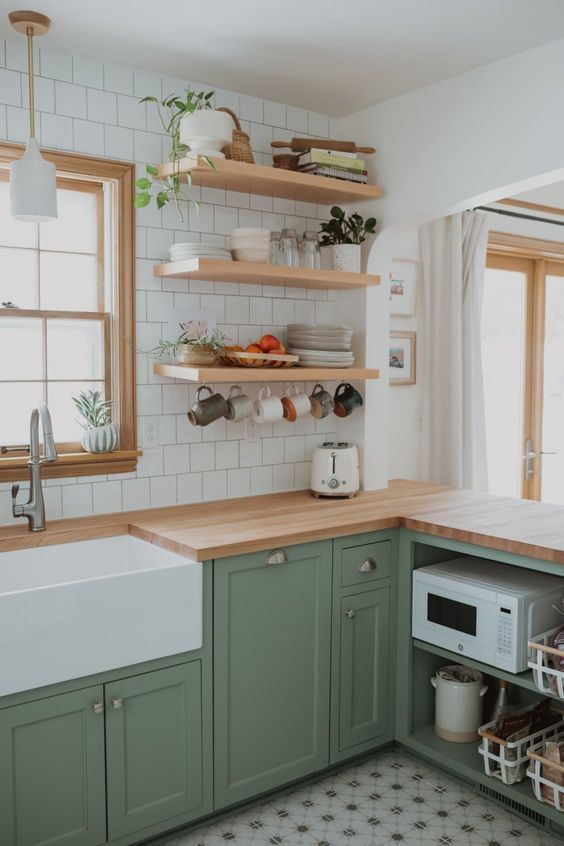

In [60]:
Image(filename ='pred.jpg', width=500, height=500)

In [75]:
pred = learn.predict('pred.jpg');pred[0]

'Contemporary'

In [81]:
pred = learn.predict(similar_df['paths'].iloc[3]);pred[0]

'Transitional'

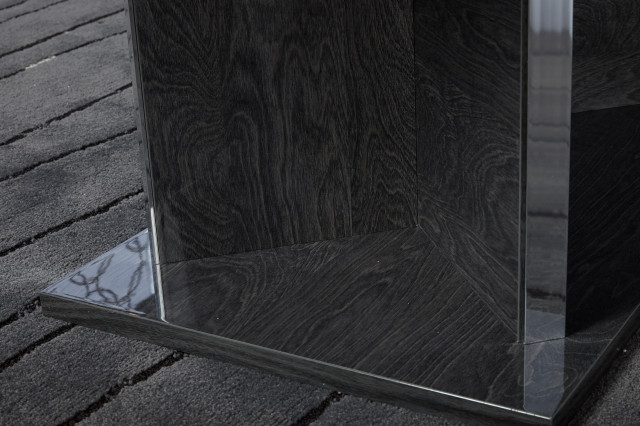

In [82]:
Image(similar_df['paths'].iloc[3])

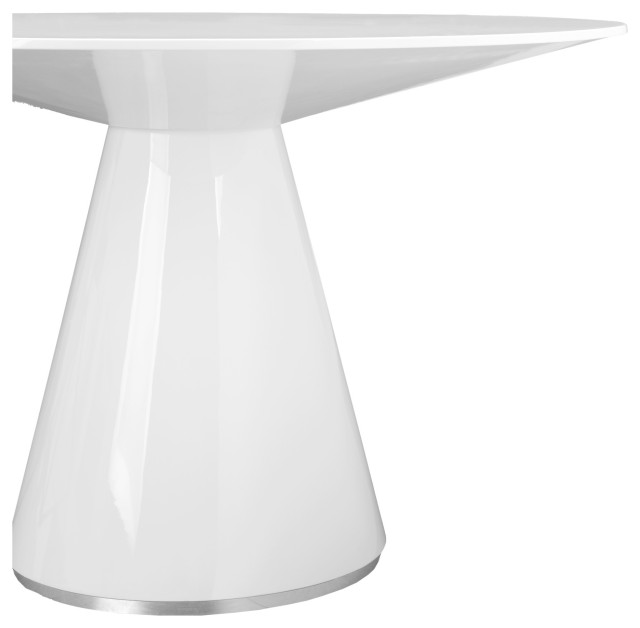

In [63]:
Image(similar_df['paths'].iloc[0])

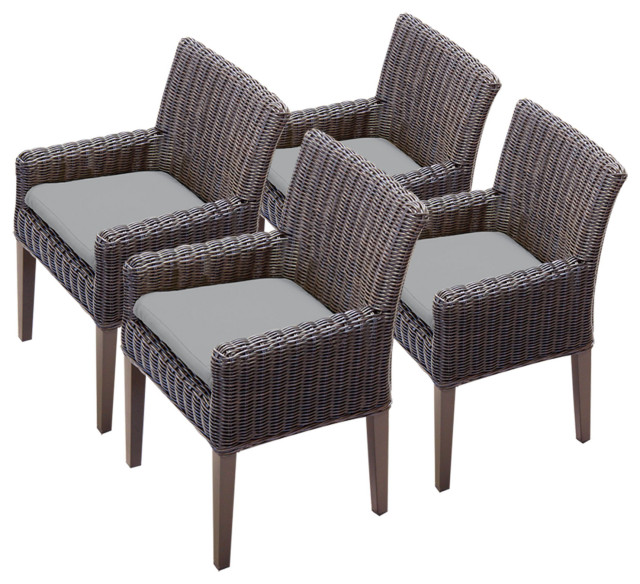

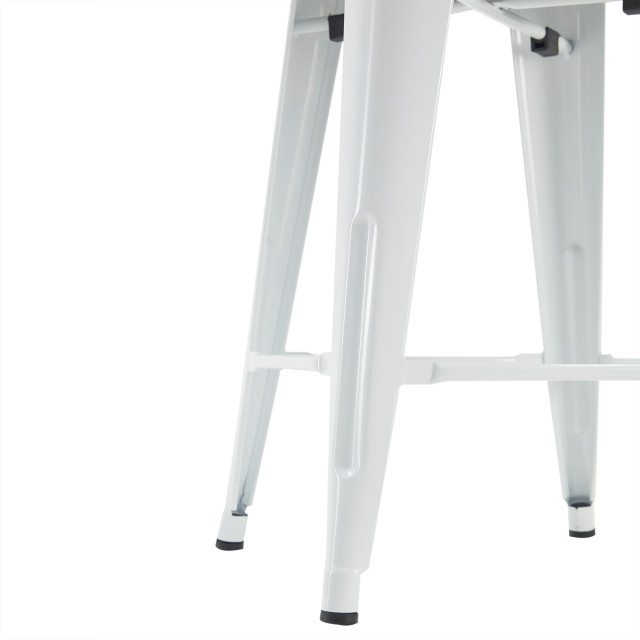

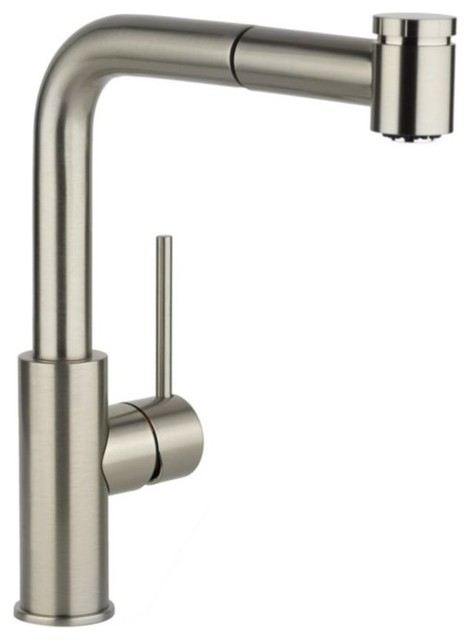

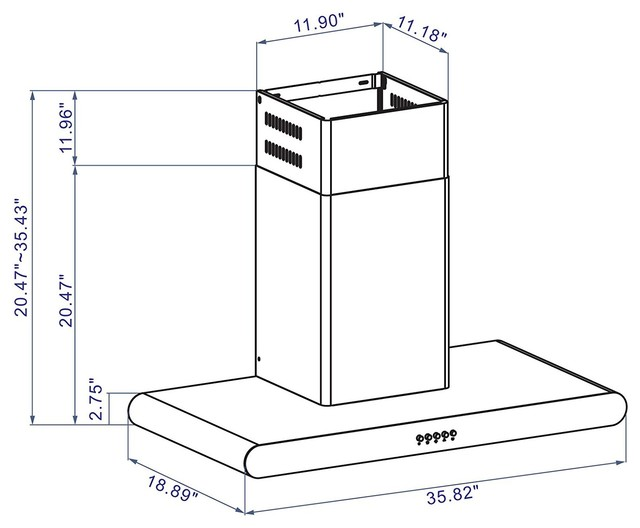

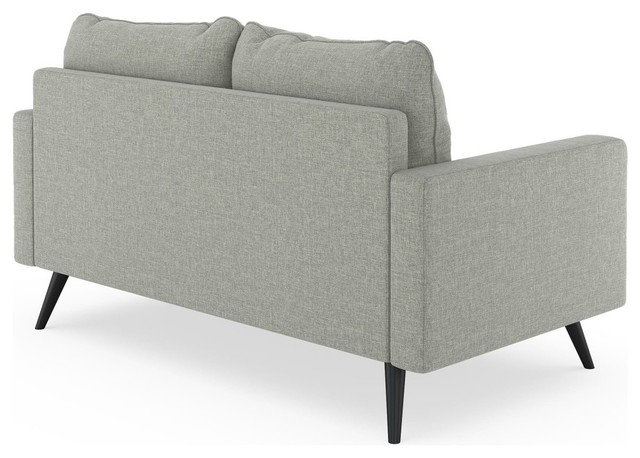

In [20]:
for i in similar:
    display(Image(filename =ssd_pictures_path/list(feature_dict.keys())[i], width=500, height=500))